In [25]:
import pandas as pd
import numpy as np
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12),index=index1)
df_obj=ser_obj.unstack(0)#unstack是把行索引变为列索引，stack是把列索引变为行索引
print(df_obj)
#计算最小值有空值如何处理
df_obj.loc[0,'b']=np.nan
print(df_obj)
print('-'*50)
print(df_obj.min(axis=0))

cloth         a         b         c         d
size                                         
0     -1.071108  0.046080 -0.393621 -1.357969
1      1.092486  0.366796  1.021089  0.583432
2     -0.670057  1.485589  1.055946  1.088202
cloth         a         b         c         d
size                                         
0     -1.071108       NaN -0.393621 -1.357969
1      1.092486  0.366796  1.021089  0.583432
2     -0.670057  1.485589  1.055946  1.088202
--------------------------------------------------
cloth
a   -1.071108
b    0.366796
c   -0.393621
d   -1.357969
dtype: float64


In [26]:
df_obj

cloth,a,b,c,d
size,,,,
0,-1.071108,NaN,-0.393621,-1.357969
1,1.092486,0.366796,1.021089,0.583432
2,-0.670057,1.485589,1.055946,1.088202


In [27]:
#观察数据分布的一种 非常常用方法
print(df_obj.describe())

cloth         a         b         c         d
count  3.000000  2.000000  3.000000  3.000000
mean  -0.216226  0.926193  0.561138  0.104555
std    1.150981  0.791106  0.827029  1.291484
min   -1.071108  0.366796 -0.393621 -1.357969
25%   -0.870582  0.646494  0.313734 -0.387268
50%   -0.670057  0.926193  1.021089  0.583432
75%    0.211215  1.205891  1.038517  0.835817
max    1.092486  1.485589  1.055946  1.088202


In [28]:
df_obj.loc[:,'c']

size
0   -0.393621
1    1.021089
2    1.055946
Name: c, dtype: float64

In [29]:
#计算最小值或者最大值的索引的位置
print(df_obj.loc[:,'c'].argmin())#argmin和argmax只能是series，不能是df

0


In [30]:
df_obj

cloth,a,b,c,d
size,,,,
0,-1.071108,NaN,-0.393621,-1.357969
1,1.092486,0.366796,1.021089,0.583432
2,-0.670057,1.485589,1.055946,1.088202


In [31]:
#返回的是一个series
#计算最小值或者最大值的索引值
df_obj.idxmin(axis=0, skipna=True)

cloth
a    0
b    1
c    0
d    0
dtype: int64

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path) #不加路径默认当前路径
# 打印数据信息
print(df.info()) #查看数据的信息
print('-'*50)
print(df.head()) #查看数值类型的数据的信息



<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   str    
 2   Genre               1000 non-null   str    
 3   Description         1000 non-null   str    
 4   Director            1000 non-null   str    
 5   Actors              1000 non-null   str    
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), str(5)
memory usage: 93.9 KB
None
--------------------------------------------------
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,

In [33]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### 任务：统计这1000部电影有多少导演和演员

In [5]:

# # 获取平均评分
# print(df["Rating"].mean())
print('-'*50)

# 导演的人数
print(len(set(df["Director"].tolist())))#集合set去重，tolist把series变为list
print(len(df["Director"].unique())) #推荐这种方式

--------------------------------------------------
644
644


In [8]:
# # 获取演员的人数
# #二维列表
temp_actors_list = df["Actors"].str.split(", ").tolist()#.str调用字符串访问器
print(temp_actors_list)


[['Chris Pratt', 'Vin Diesel', 'Bradley Cooper', 'Zoe Saldana'], ['Noomi Rapace', 'Logan Marshall-Green', 'Michael Fassbender', 'Charlize Theron'], ['James McAvoy', 'Anya Taylor-Joy', 'Haley Lu Richardson', 'Jessica Sula'], ['Matthew McConaughey,Reese Witherspoon', 'Seth MacFarlane', 'Scarlett Johansson'], ['Will Smith', 'Jared Leto', 'Margot Robbie', 'Viola Davis'], ['Matt Damon', 'Tian Jing', 'Willem Dafoe', 'Andy Lau'], ['Ryan Gosling', 'Emma Stone', 'Rosemarie DeWitt', 'J.K. Simmons'], ['Essie Davis', 'Andrea Riseborough', 'Julian Barratt,Kenneth Branagh'], ['Charlie Hunnam', 'Robert Pattinson', 'Sienna Miller', 'Tom Holland'], ['Jennifer Lawrence', 'Chris Pratt', 'Michael Sheen,Laurence Fishburne'], ['Eddie Redmayne', 'Katherine Waterston', 'Alison Sudol,Dan Fogler'], ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe,Kevin Costner'], ['Felicity Jones', 'Diego Luna', 'Alan Tudyk', 'Donnie Yen'], ["Auli'i Cravalho", 'Dwayne Johnson', 'Rachel House', 'Temuera Morrison'], ['Anne 

In [9]:
actors_list = [i for j in temp_actors_list for i in j]  #二维展为一维
actors_num = len(set(actors_list)) #set去重
print(actors_num) #演员的数量

2015


In [14]:
#想知道每个演员出演的电影数量
u,indices = np.unique(actors_list,return_counts = True)
print (u)
indices

array([1, 1, 1, ..., 1, 1, 1], shape=(2015,))

### 8.3.1 电影时长的关系

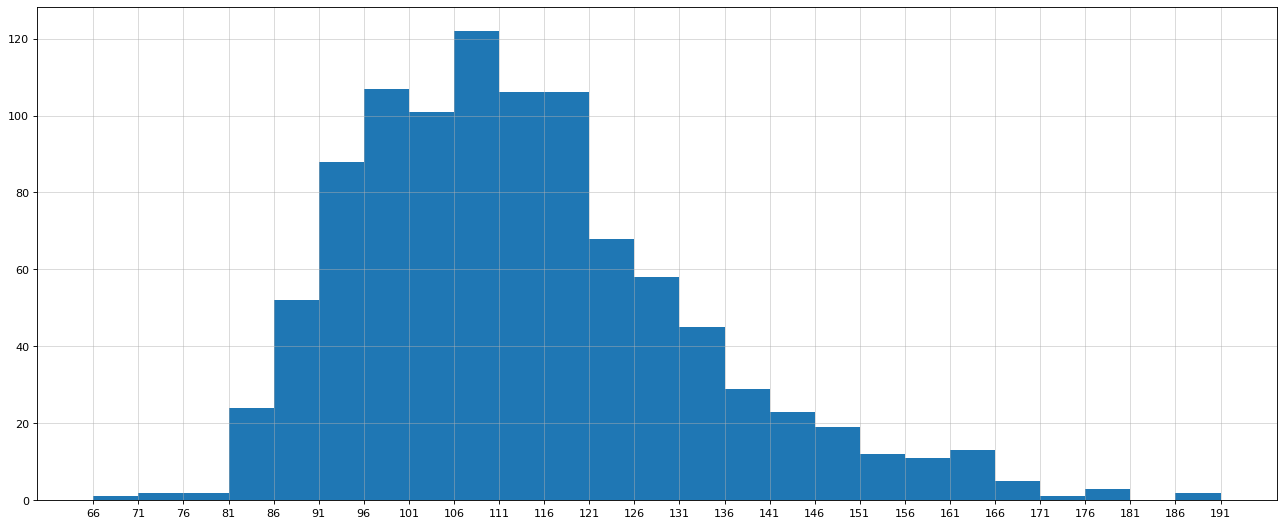

In [17]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print(min_runtime,max_runtime)
# 计算组数
print(max_runtime - min_runtime)
print('-'*50)
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5) #alpha是透明度
#range第三个参数是步长
plt.xticks(range(min_runtime, max_runtime + 5,5))

plt.show()

In [18]:
#电影评分的分布情况
# 获取平均评分
print(f"{df["Rating"].mean():.2f}")

# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Rating"].values
print(type(runtime_data))
max_runtime = runtime_data.max()
min_runtime = runtime_data.min()
print('-'*50)
print(max_runtime,min_runtime) #最大值最小值电影评分

6.72
<class 'numpy.ndarray'>
--------------------------------------------------
9.0 1.9


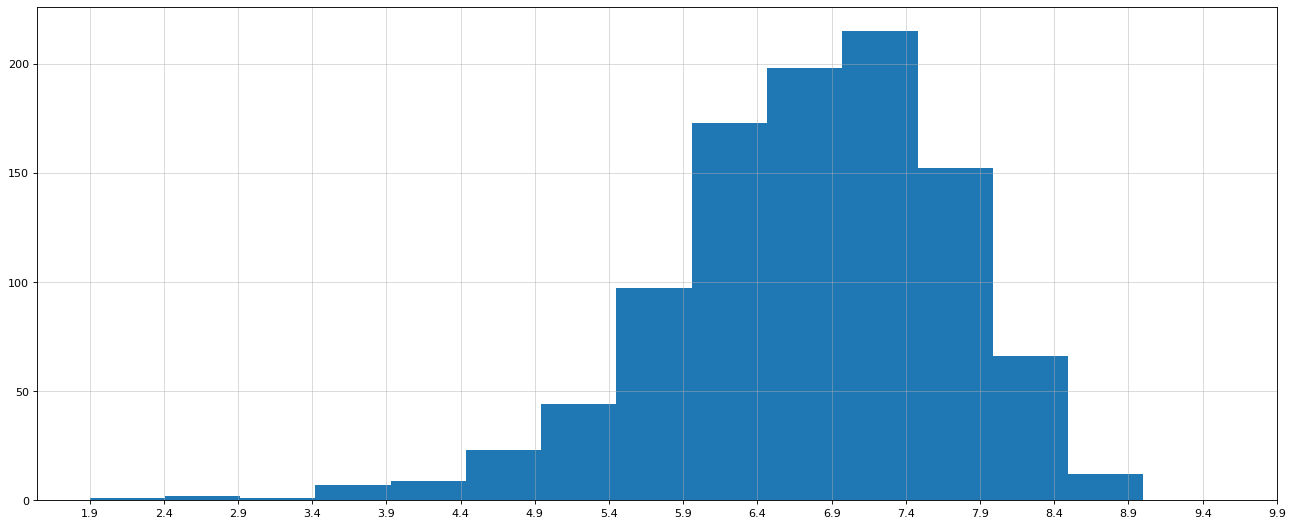

In [19]:
# 计算组数
print(f'最大评分减去最小评分为{max_runtime - min_runtime}')
num_bin = (max_runtime - min_runtime) // 0.5  #对不齐的原因是9.0-1.9不能整除0.5

print(f'组数为{num_bin}')
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_runtime]
i = min_runtime
while i <= max_runtime + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x) #设置x轴的刻度

plt.show()

### 8.3.3 导演要拍什么题材电影

In [20]:

print(df["Genre"].head(3))  #看前几条数据，掌握格式，内容类型

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
Name: Genre, dtype: str


In [21]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list)) # 20个题材类型
# 构造全为0的数组，行是原来的样本数，列是题材类型数目，one-hot编码，
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

20
     Western  Action  Fantasy  Drama  Adventure  Comedy  Music  Mystery  \
0        0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
1        0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
2        0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
3        0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
4        0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
..       ...     ...      ...    ...        ...     ...    ...      ...   
995      0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
996      0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
997      0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
998      0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   
999      0.0     0.0      0.0    0.0        0.0     0.0    0.0      0.0   

     Musical  Biography  War  Crime  History  Sport  Animation  Family  \
0        0.0        0.

In [22]:
# 给每个电影出现分类的位置赋值1,one-hot的中文是独热码
for i in range(df.shape[0]):
    #temp_list是二维列表，temp_list[i]是一个一维列表
    zeros_df.loc[i, temp_list[i]] = 1 #temp_list[i]是一个列表，里面是分类

zeros_df.head(3)

,Western,Action,Fantasy,Drama,Adventure,Comedy,Music,Mystery,Musical,Biography,War,Crime,History,Sport,Animation,Family,Sci-Fi,Romance,Horror,Thriller
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [44]:
# 统计每个分类的电影的数量和，genre_count是一个series，index是分类，values是数量
genre_count = zeros_df.sum(axis=0)
print(genre_count)

Thriller     195.0
Musical        5.0
Romance      141.0
Western        7.0
Music         16.0
Sci-Fi       120.0
Animation     49.0
Fantasy      101.0
Drama        513.0
Action       303.0
Crime        150.0
History       29.0
Sport         18.0
War           13.0
Family        51.0
Adventure    259.0
Biography     81.0
Horror       119.0
Mystery      106.0
Comedy       279.0
dtype: float64


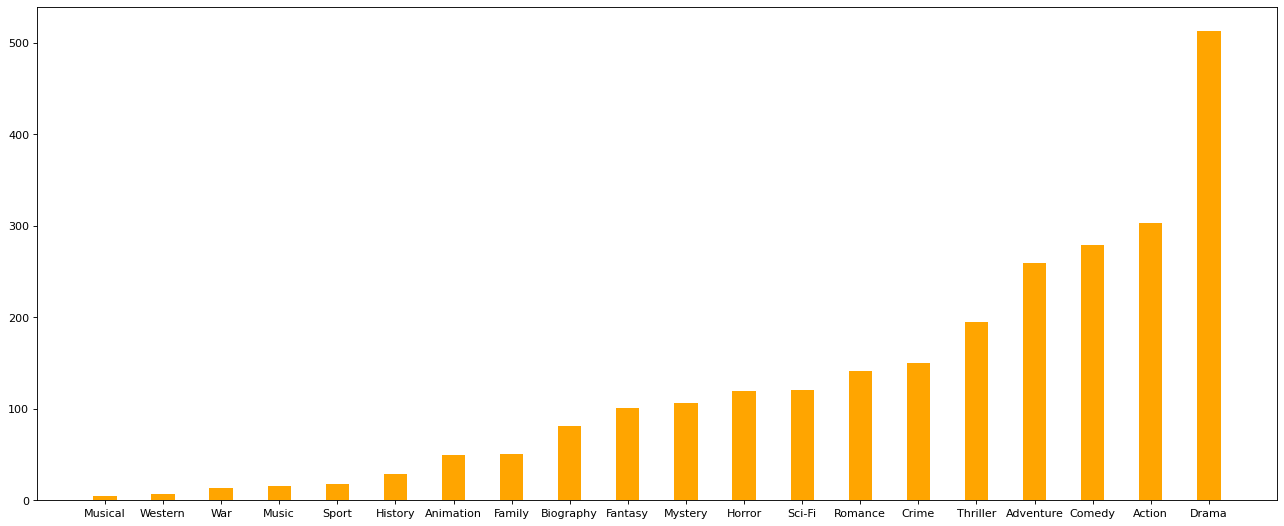

In [45]:
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()